In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#pip install pystan==2.19.1.1

In [5]:
pip install prophet

     |████████████████████████████████| 65 kB 793 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 179 kB 3.6 MB/s eta 0:00:01
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6643819 sha256=193337266a5d91bb467ae2c04c683a51817f9d546ac48745b712453fc959ff1e
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from prophet import Prophet

In [7]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import matplotlib.dates as mdates

In [37]:
#getting the stock data using yahoo finance

start = dt.datetime(2010, 1, 1)
end = dt.datetime(2016,1,1)
df = web.DataReader("FB", 'yahoo', start, end)  # Collects data


#prices in USD

In [38]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [39]:
df.reset_index(inplace=True)

In [40]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
1,2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2,2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
3,2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
4,2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [41]:
data=df[["Date","Adj Close"]]

In [42]:
data.head()

,Date,Adj Close
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [43]:
data=data.rename(columns={"Date": "ds", "Adj Close": "y"})

In [44]:
#now it is usable for FB Prophet

data.head()

,ds,y
0,2012-05-18,38.230000
1,2012-05-21,34.029999
2,2012-05-22,31.000000
3,2012-05-23,32.000000
4,2012-05-24,33.029999


In [45]:
len(data)

911

In [46]:
df_train=data[0:500]
df_test=data[500:911]

In [47]:
m = Prophet()
m.fit(df_train)

In [50]:
future = m.make_future_dataframe(periods=411)

In [51]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
906,2015-06-26,94.930235,62.041478,126.701194
907,2015-06-27,98.445669,64.510358,130.549591
908,2015-06-28,98.516729,64.349550,132.015161
909,2015-06-29,94.769101,60.758711,127.948580
910,2015-06-30,94.942950,60.568571,128.882600


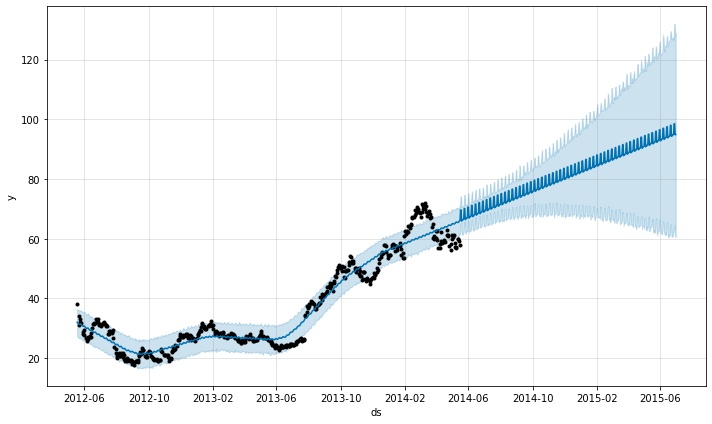

In [52]:
fig1 = m.plot(forecast)


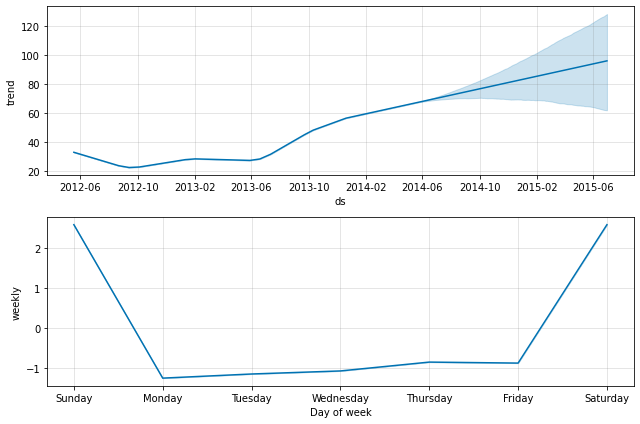

In [53]:
fig2 = m.plot_components(forecast)

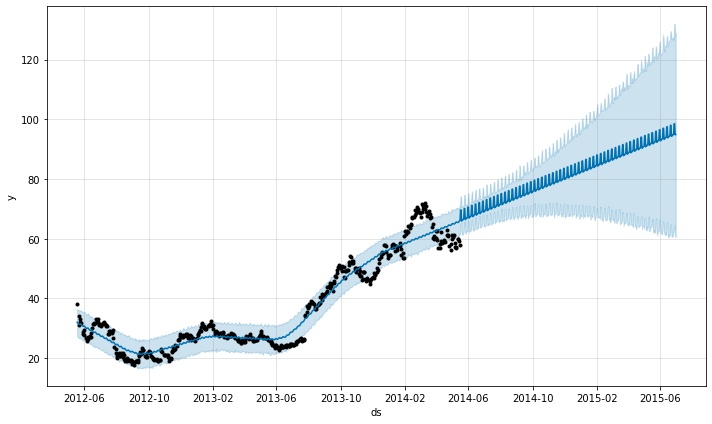

In [54]:
fig1

In [63]:
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

Text(0, 0.5, 'Stock Value')

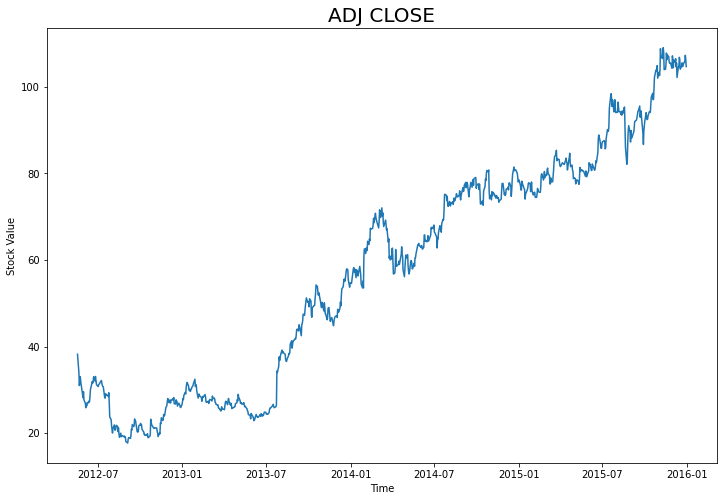

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(df["Adj Close"])
plt.title('ADJ CLOSE', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Stock Value')